In [241]:
import pandas as pd
import scipy.stats as sc
import math
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_excel('data_interval_test.xlsx', header=None)
dataset.columns = dataset.iloc[2]
dataset.drop(dataset.index[[0,1,2]], inplace=True)
dataset.reset_index(inplace = True, drop = True)
dataset.head()

alpha=0.05

## Подготовка данных

In [242]:
# поиск дубликатов
# дубликаты отсутствуют
dataset.drop_duplicates()

2,actionGroup,magazin,days,Revenue,# Checks,Qty,Avg Check Size,Avg Check,before days,before Revenue,before # Checks,before Qty,before Avg Check Size,before Avg Check
0,Акция 1,1,16,36987.28,132,220,1.666667,280.206667,16,24969.44,92,150,1.6304,271.406957
1,Акция 1,2,16,70944.0428,358,636,1.776536,198.167717,16,82326.7109,299,473,1.5819,275.34017
2,Акция 1,3,16,93335.78,440,791,1.797727,212.126773,16,68219.68,291,411,1.4124,234.43189
3,Акция 1,4,16,28390.5,130,168,1.292308,218.388462,16,22224.93,124,139,1.121,179.233306
4,Акция 1,5,16,35707.34,122,165,1.352459,292.683115,16,17469.51,85,106,1.2471,205.523647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Акция 1,441,16,24352.62,132,197,1.492424,184.489545,16,14462.4,83,99,1.1928,174.245783
441,Акция 1,442,15,24500.67,91,141,1.549451,269.238132,16,18177.17,50,59,1.18,363.5434
442,Акция 1,443,9,7653.28,15,24,1.6,510.218667,7,1669.69,10,11,1.1,166.969
443,Акция 1,444,16,29977.3,126,154,1.222222,237.915079,15,18961.58,62,71,1.1452,305.831935


In [243]:
# поиск пропусков
# количество пропусков мало относительно выборки, пропуски игнорируются
dataset.isnull().sum()

2
actionGroup              0
magazin                  0
days                     0
Revenue                  0
# Checks                 0
Qty                      0
Avg Check Size           0
Avg Check                0
before days              9
before Revenue           9
before # Checks          9
before Qty               9
before Avg Check Size    9
before Avg Check         9
dtype: int64

In [244]:
names = ['delta rev', 'delta checks', 'delta Qty', 'delta Avg Check Size','delta Avg Check' ]

# изменение показателей после акции
dataset['delta rev'] = dataset['Revenue'] - dataset['before Revenue']
dataset['delta checks'] = dataset['# Checks'] - dataset['before # Checks']
dataset['delta Qty'] = dataset['Qty'] - dataset['before Qty']
dataset['delta Avg Check Size'] = dataset['Avg Check Size'] - dataset['before Avg Check Size']
dataset['delta Avg Check'] = dataset['Avg Check'] - dataset['before Avg Check']
dataset

2,actionGroup,magazin,days,Revenue,# Checks,Qty,Avg Check Size,Avg Check,before days,before Revenue,before # Checks,before Qty,before Avg Check Size,before Avg Check,delta rev,delta checks,delta Qty,delta Avg Check Size,delta Avg Check
0,Акция 1,1,16,36987.28,132,220,1.666667,280.206667,16,24969.44,92,150,1.6304,271.406957,12017.84,40,70,0.036267,8.79971
1,Акция 1,2,16,70944.0428,358,636,1.776536,198.167717,16,82326.7109,299,473,1.5819,275.34017,-11382.6681,59,163,0.194636,-77.172453
2,Акция 1,3,16,93335.78,440,791,1.797727,212.126773,16,68219.68,291,411,1.4124,234.43189,25116.1,149,380,0.385327,-22.305117
3,Акция 1,4,16,28390.5,130,168,1.292308,218.388462,16,22224.93,124,139,1.121,179.233306,6165.57,6,29,0.171308,39.155155
4,Акция 1,5,16,35707.34,122,165,1.352459,292.683115,16,17469.51,85,106,1.2471,205.523647,18237.83,37,59,0.105359,87.159468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Акция 1,441,16,24352.62,132,197,1.492424,184.489545,16,14462.4,83,99,1.1928,174.245783,9890.22,49,98,0.299624,10.243762
441,Акция 1,442,15,24500.67,91,141,1.549451,269.238132,16,18177.17,50,59,1.18,363.5434,6323.5,41,82,0.369451,-94.305268
442,Акция 1,443,9,7653.28,15,24,1.6,510.218667,7,1669.69,10,11,1.1,166.969,5983.59,5,13,0.5,343.249667
443,Акция 1,444,16,29977.3,126,154,1.222222,237.915079,15,18961.58,62,71,1.1452,305.831935,11015.72,64,83,0.077022,-67.916856


### Проверка нормальности распределений

In [253]:
def isnorm(ds, name):

    stat, p = sc.shapiro(ds[name])
    alpha=0.05

    if p>alpha:
        return (f"p = {p} распределение {name} нормальное")
    else:
        return (f"p = {p} распределение {name} ненормальное")

In [246]:
for name in names:
    print(isnorm(dataset, name))

p = 1.0 распределение delta rev нормальное
p = 1.0 распределение delta checks нормальное
p = 1.0 распределение delta Qty нормальное
p = 1.0 распределение delta Avg Check Size нормальное
p = 1.0 распределение delta Avg Check нормальное


## Расчет доверительных интервалов

In [247]:
def interval(ds, name):
    n = ds[name].count()

    mean = ds[name].mean()
    sd = ds[name].std(ddof=1)/sqrt(n)

    interval = sc.norm.interval(0.95, loc=mean, scale=sd)

    return [name, round(mean, 3), round(sd, 3), round(interval[0], 3), round(interval[1], 3)]

In [248]:
intervals_list = []
for name in names:
    intervals_list.append(interval(dataset, name))
    
intervals_set = pd.DataFrame(intervals_list)
intervals_set.columns = ['name', 'mean', 'standart deviation', 'left interval', 'right intrval']
intervals_set.head()

,name,mean,standart deviation,left interval,right intrval
0,delta rev,4775.088,486.733,3821.109,5729.066
1,delta checks,47.968,4.147,39.841,56.095
2,delta Qty,80.534,5.970,68.834,92.235
3,delta Avg Check Size,0.126,0.015,0.097,0.155
4,delta Avg Check,-13.766,6.525,-26.555,-0.978


## Оценка изменения параметров
в качестве показателя изменения параметров расчитано изменение значения в процентах относительно значения до акции

In [249]:
before_mean = [dataset['Revenue'].mean(), dataset['# Checks'].mean(), dataset['Qty'].mean(),
               dataset['Avg Check Size'].mean(), dataset['Avg Check'].mean(), ]
intervals_set['before mean'] = before_mean

intervals_set['delta %'] = round((intervals_set['mean']/intervals_set['before mean'] * 100),2)

intervals_set.head()

,name,mean,standart deviation,left interval,right intrval,before mean,delta %
0,delta rev,4775.088,486.733,3821.109,5729.066,31876.618200,14.98
1,delta checks,47.968,4.147,39.841,56.095,169.966292,28.22
2,delta Qty,80.534,5.970,68.834,92.235,244.233708,32.97
3,delta Avg Check Size,0.126,0.015,0.097,0.155,1.474106,8.55
4,delta Avg Check,-13.766,6.525,-26.555,-0.978,288.863594,-4.77


## Графическое представление интервалов

In [250]:
def interval_fig(ds, name):
    
    n = ds[name].count()

    mean = ds[name].mean()
    sd = ds[name].std(ddof=1)/sqrt(n)

    interval = sc.norm.interval(0.95, loc=mean, scale=sd)
    h = list(ds[name])
    h.sort()
    
    plt.figure(figsize=(10,5))
    
    pdf=sc.norm.pdf(h, mean, sd)
    plt.plot(h, pdf)
    plt.plot((interval[0],interval[0]),(0,max(pdf)), color='red', label=str(round(interval[0],2)))
    plt.plot((interval[1],interval[1]),(0,max(pdf)), color='red', label=str(round(interval[1],2)))
    plt.xlabel(name)
    plt.legend()
    return plt.show()

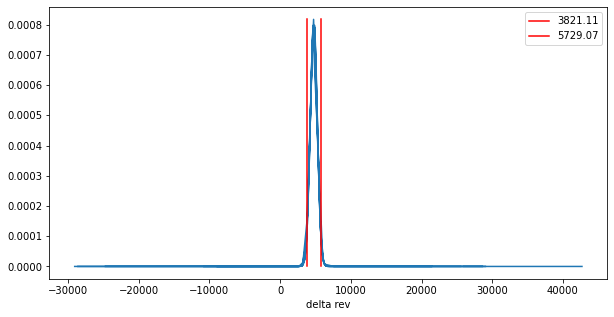

None


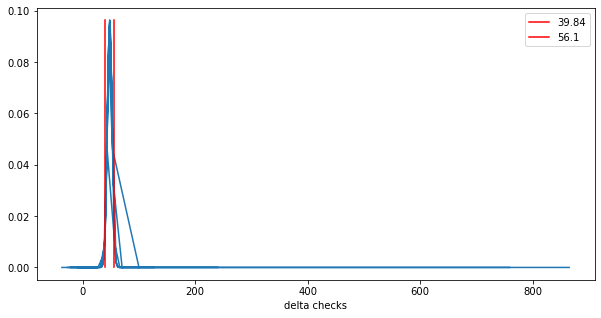

None


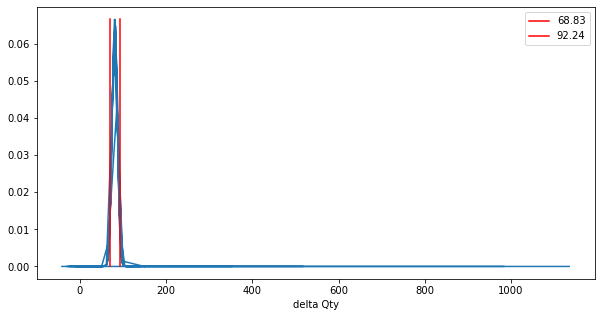

None


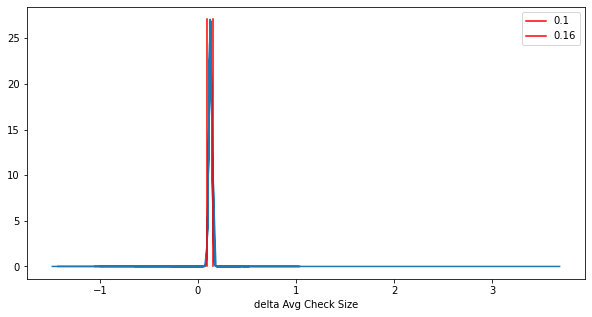

None


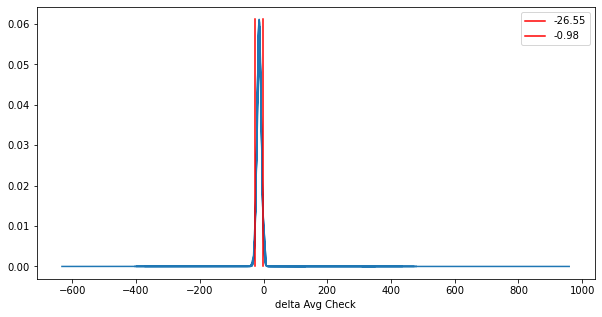

None


In [251]:
for name in names:
    print(interval_fig(dataset, name))

## Важность показателей

In [252]:
corr_ds = dataset.drop(['actionGroup', 'magazin', 'days', 'before days'], axis=1)
corr_ds = corr_ds.astype(float)
corr_ds.corr()['delta rev'].sort_values(ascending=False)

2
delta rev                1.000000
delta Qty                0.458380
Revenue                  0.402574
delta checks             0.396748
Qty                      0.357836
delta Avg Check          0.350422
# Checks                 0.340872
before # Checks          0.295652
before Qty               0.279050
delta Avg Check Size     0.154174
Avg Check Size           0.081080
before Revenue           0.051165
Avg Check               -0.041036
before Avg Check Size   -0.111116
before Avg Check        -0.365377
Name: delta rev, dtype: float64

## Выводы
Для оценки значимости изменений показателей и вычисления доверительных интервалов были расчитаны изменения каждого показателя (delta), где положительные значения отражают увеличение показателя после акции. Все распределения delta - нормальные, согласно критерию Шапиро-Уилка.

Интервалы были вычеслены с помощью стандартного отклонения, так как объем выборки достаточный. Точность определения интервалов - 0,95

Была проведена оценка изменения показателей и расчитан (delta %), показатель отражающий на сколько изменились показатели в процентах. Наибольшее изменение имеет Qty - показатель вырос на 32,97%

Была проведена оценка влияния имеющихся показателей на рост выручки (delta rev) - наибольшее влияние на этот показатель оказывают:<br/> Qty, Revenue, delta checks